In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
npInputDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npInputDataset.npy")
npXTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npXTargetDataset.npy")
npYTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npYTargetDataset.npy")
npUTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npUTargetDataset.npy")
npVTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npVTargetDataset.npy")
npAccXTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npXTargetDataset.npy")
npAccYTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npAccYTargetDataset.npy")
npRhoTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npRhoTargetDataset.npy")
npPTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npPTargetDataset.npy")
npCollidingTotal = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npCollidingTotal.npy")

In [3]:
npXTargetDataset = np.expand_dims(npXTargetDataset, axis=-1)
npYTargetDataset= np.expand_dims(npYTargetDataset, axis=-1)
npUTargetDataset= np.expand_dims(npUTargetDataset, axis=-1)
npVTargetDataset= np.expand_dims(npVTargetDataset, axis=-1)
npAccXTargetDataset = np.expand_dims(npAccXTargetDataset, axis=-1)
npAccYTargetDataset= np.expand_dims(npAccYTargetDataset, axis=-1)
npRhoTargetDataset =np.expand_dims(npRhoTargetDataset, axis=-1)
npPTargetDataset = np.expand_dims(npPTargetDataset, axis=-1)
npCollidingTotal = np.expand_dims(npCollidingTotal,axis=-1)

In [4]:
np.random.RandomState(42)

In [5]:
# The number of data
NData = 100

# The number of particles
NParticles = 100

# The number of TimeSteps
NTimeSteps = 200

# The number of parameters
NParameters = 4

# The number of Targets
NTargets = 8

In [6]:
# StandardScalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [7]:
Inputdataset = ((scaler.fit_transform(npInputDataset.reshape(-1,104)))[:,100:]).reshape(NData,NTimeSteps,NParticles,-1)

ValueError: cannot reshape array of size 8000000 into shape (104)

In [ ]:
TargetName = ["X","Y","U","V","AccX","AccY","Rho","P"]

In [ ]:
TargetDataset = np.array([npXTargetDataset,npYTargetDataset])

In [ ]:
for target in TargetName:
    os.makedirs(f'./Model{target}h5',exist_ok=True)
    

# CNN

In [8]:
# for target in TargetName:
#     os.makedirs(f'./ModelCNN{target}h5',exist_ok=True)
    

NameError: name 'TargetName' is not defined

In [9]:
Inputdataset = Inputdataset.reshape(NData, -1, 4)

NameError: name 'Inputdataset' is not defined

In [10]:
for target in range(2):
    
    Dataset = TargetDataset[target].reshape(NData,-1,1)
    # Linear model
    model = keras.Sequential()
    model.add(keras.layers.LSTM(32, activation="tanh",input_shape = ((NTimeSteps*NParticles),NParameters)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100,activation="tanh"))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(20000, activation="linear") )

    X_train1, X_test1, y_train1, y_test1 = train_test_split(Inputdataset, Dataset, test_size=0.25, random_state=42)
    X_train1, X_Val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size = 0.25, random_state = 42)

    # fitting
    model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['MSE'])
    checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath =f'./ModelCNN{TargetName[target]}h5/Model{TargetName[target]}.h5')
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=False)
    history = model.fit(X_train1,y_train1,epochs=3000, validation_data=(X_Val1,y_val1),callbacks=[checkpoint_cb,early_stopping_cb])



NameError: name 'TargetDataset' is not defined

In [112]:
ModelX = keras.models.load_model('./ModelCNNXh5/ModelX.h5')
ModelY = keras.models.load_model('./ModelCNNYh5/ModelY.h5')

In [113]:
X = ModelX.predict(Inputdataset)
Y = ModelX.predict(Inputdataset)


In [114]:
X = X.reshape(NData,NTimeSteps,NParticles)

In [115]:
Y = Y.reshape(NData,NTimeSteps,NParticles)

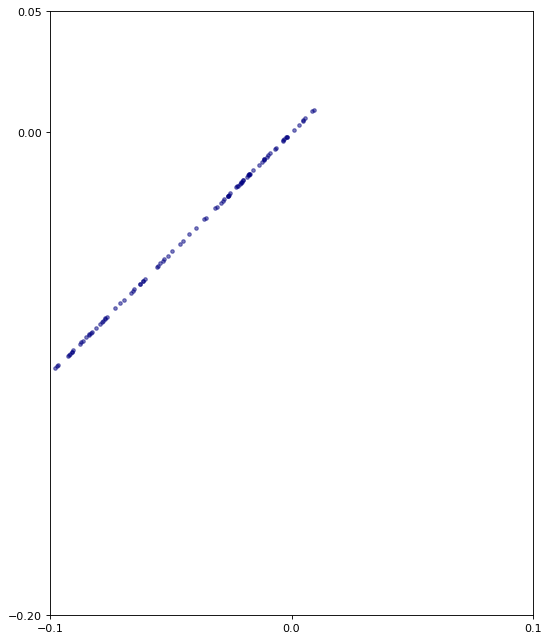

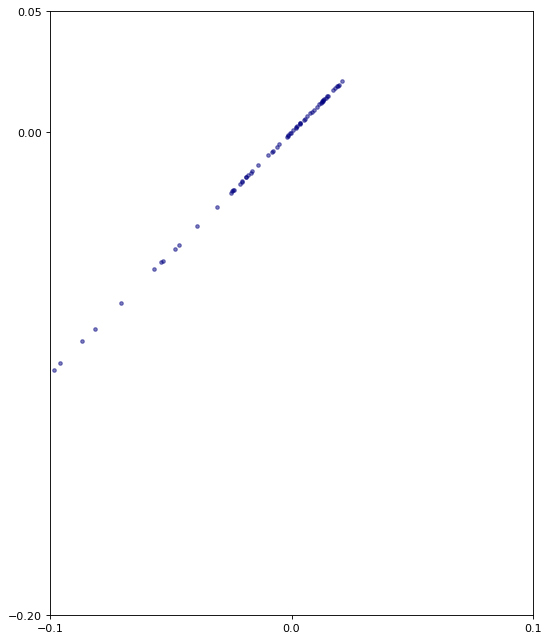

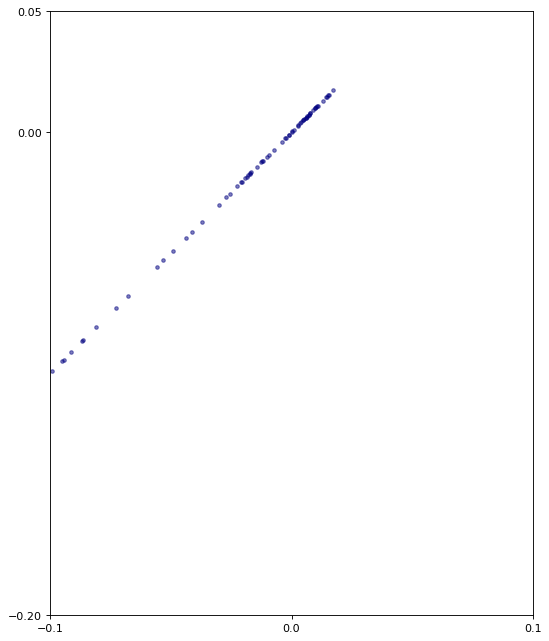

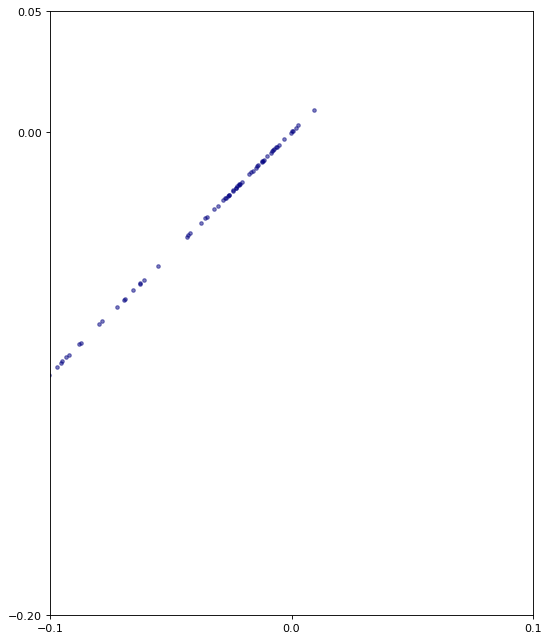

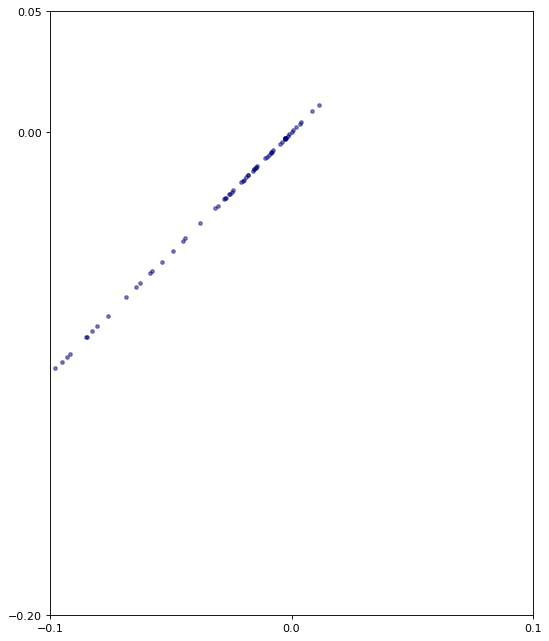

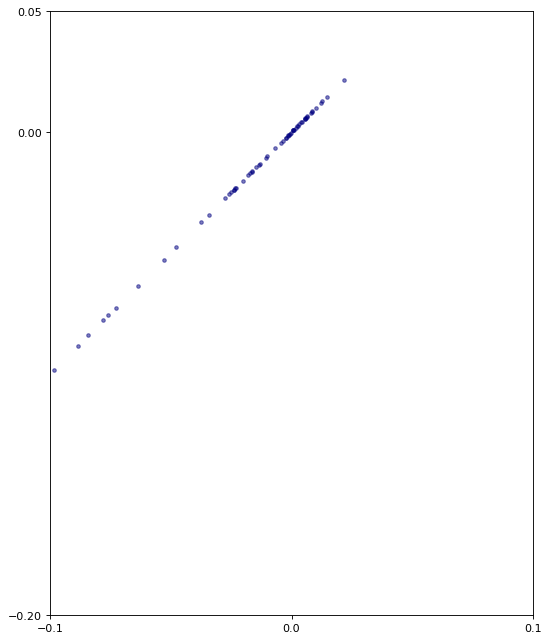

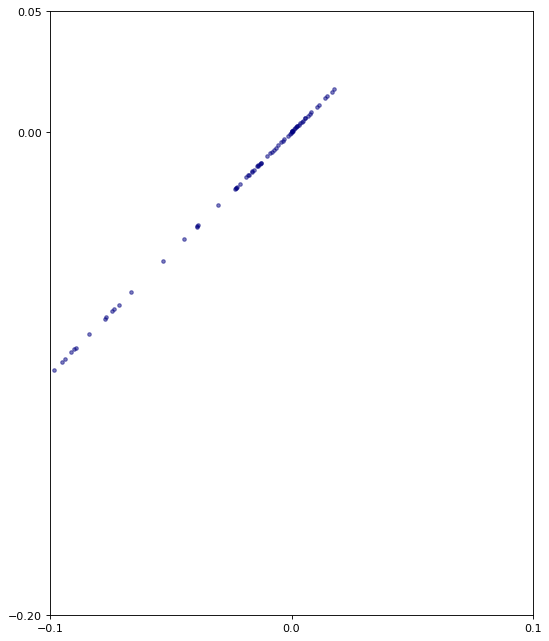

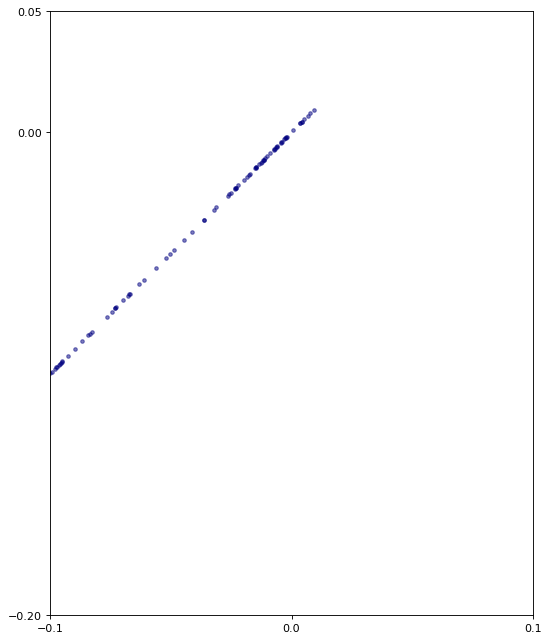

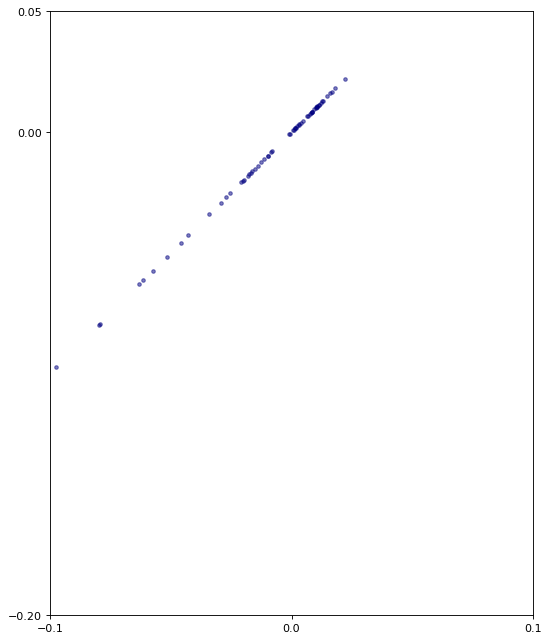

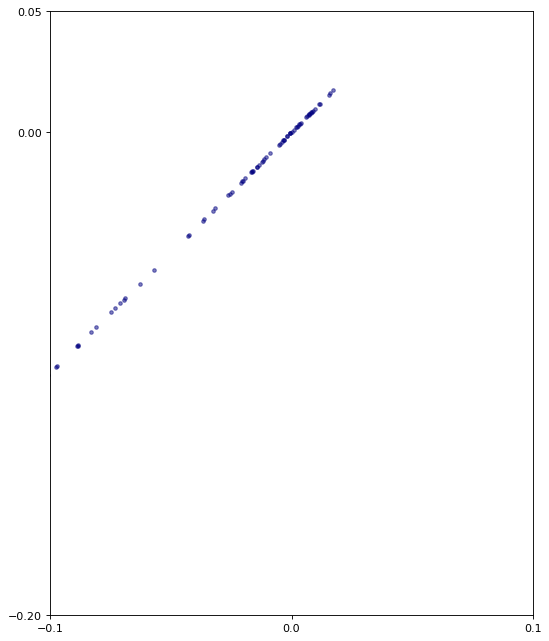

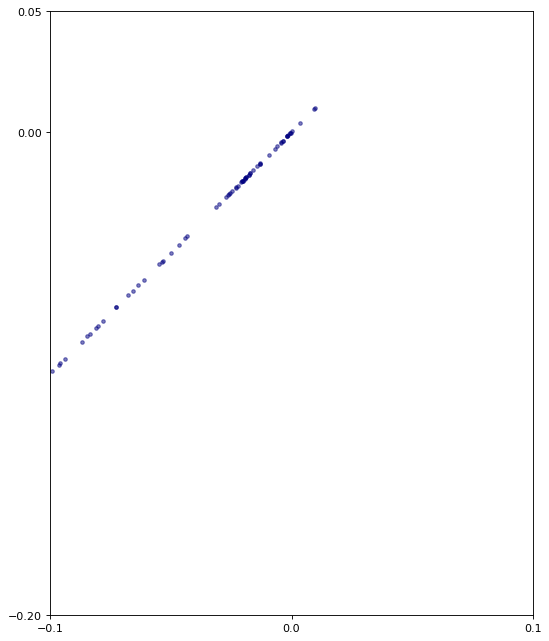

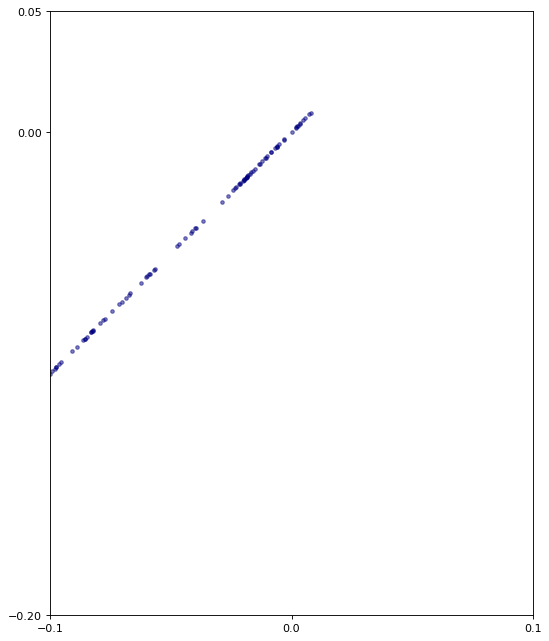

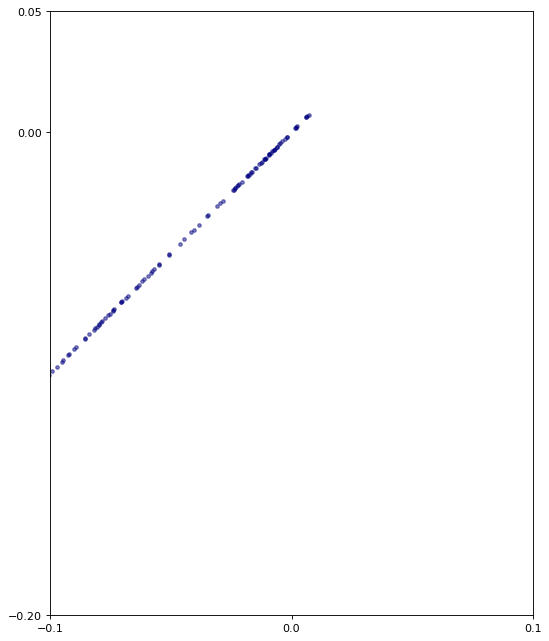

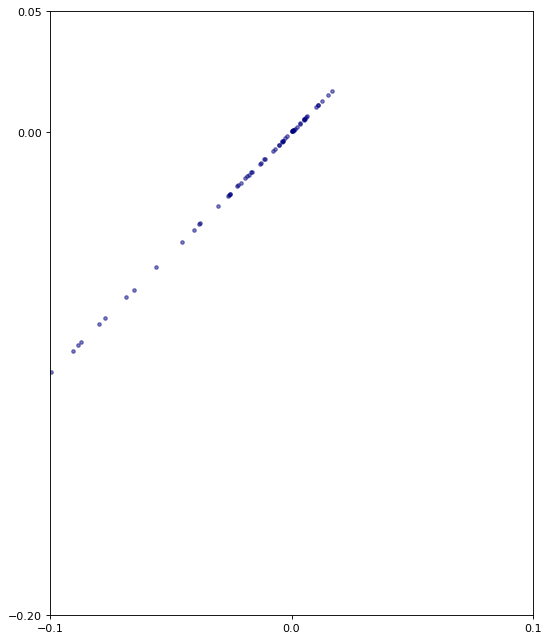

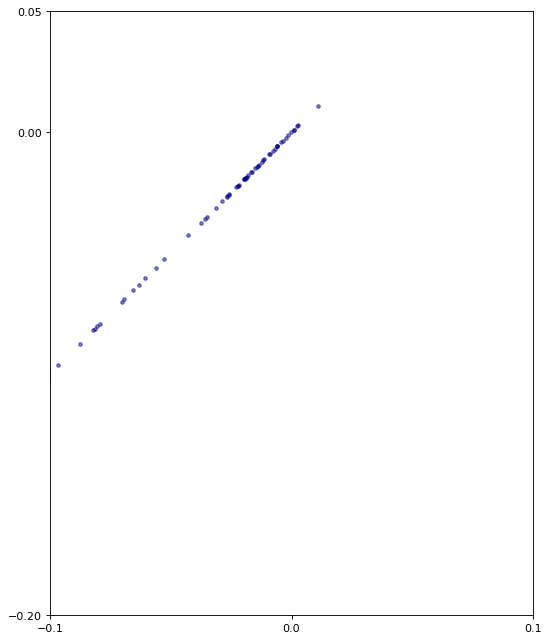

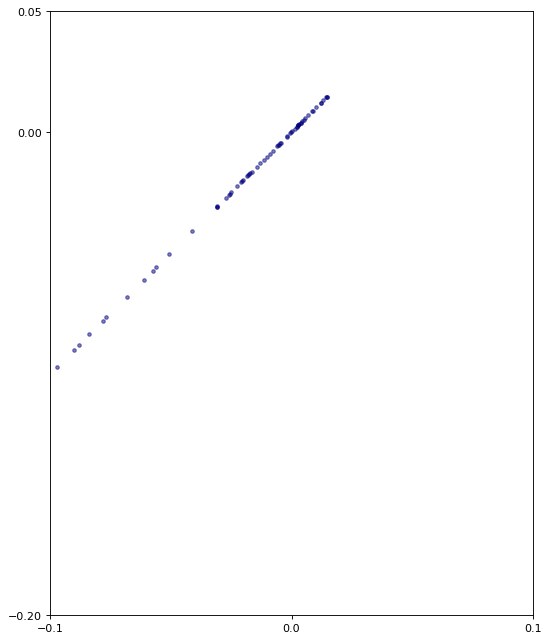

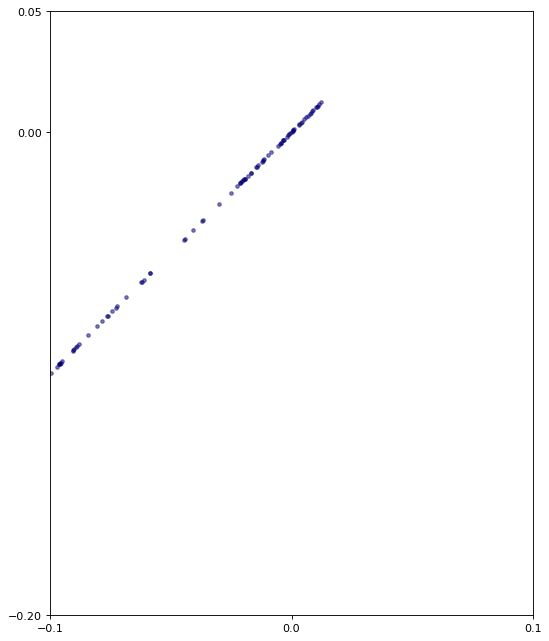

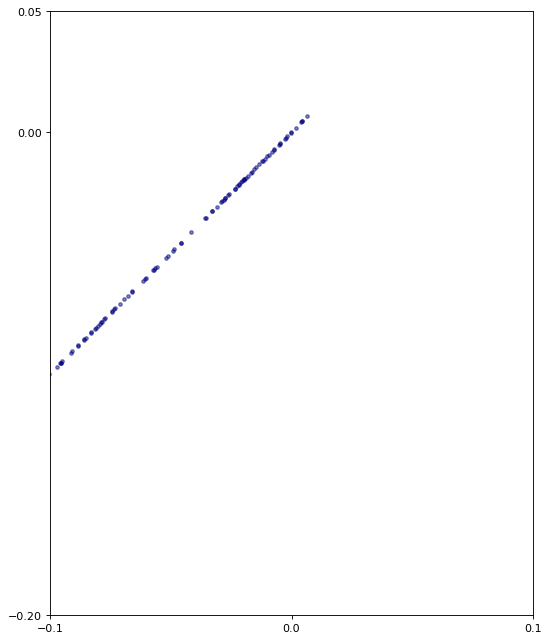

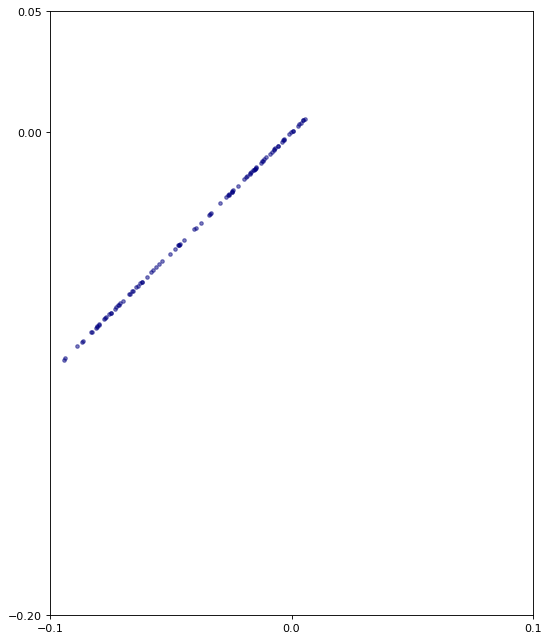

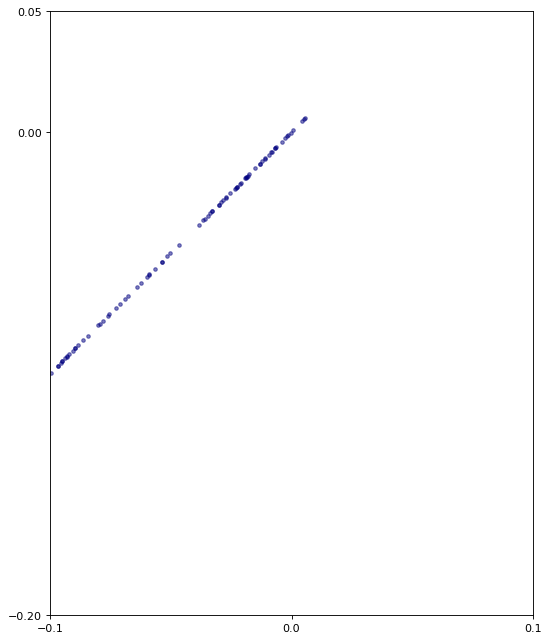

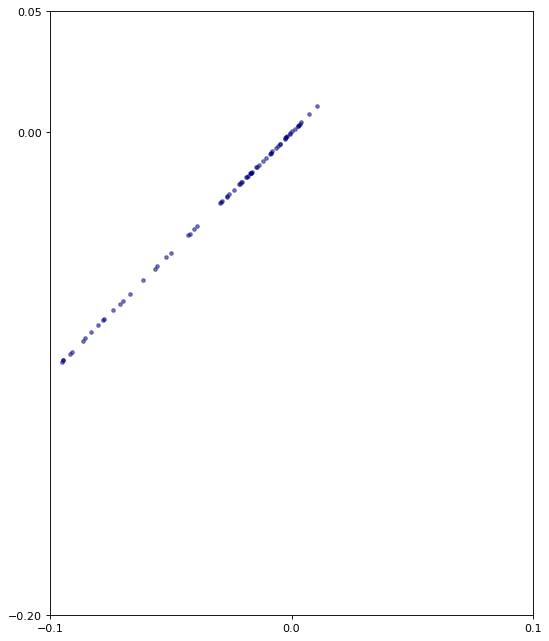

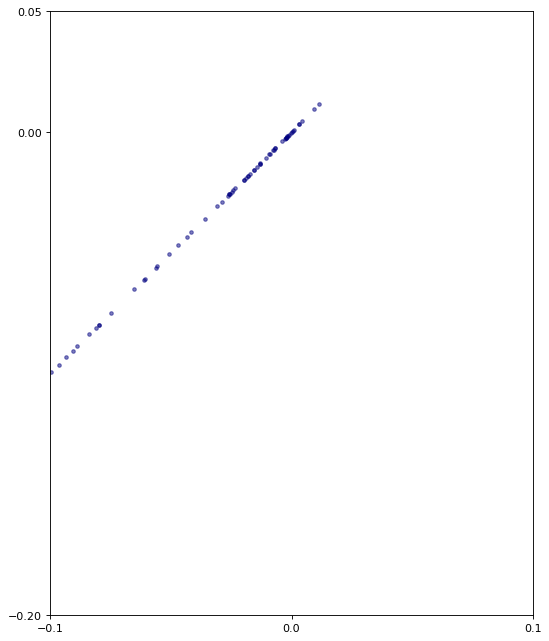

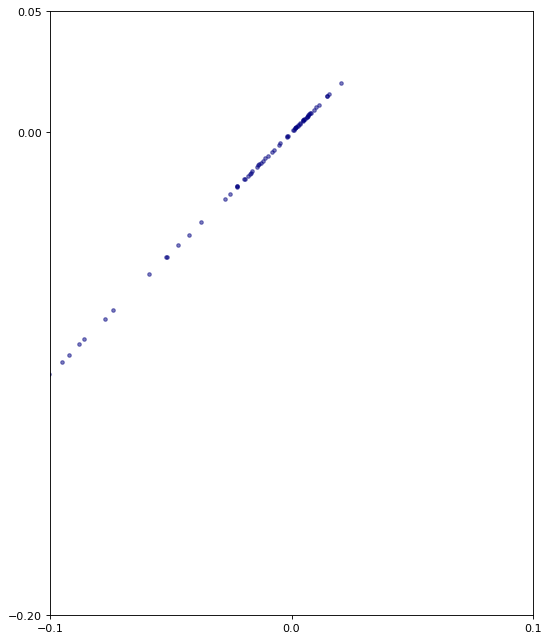

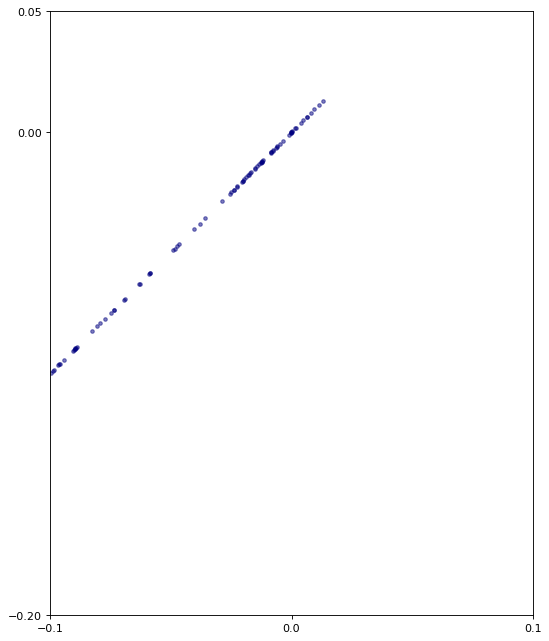

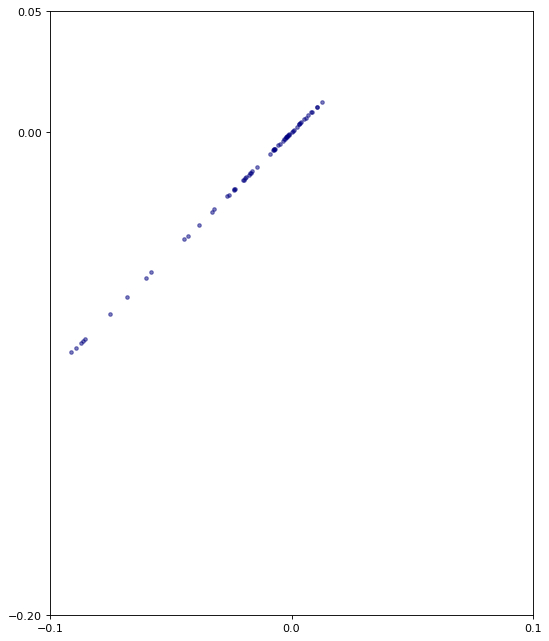

In [ ]:
for data in range(100):
    TimeStep = 190
    fig = plt.figure(figsize=(10, 10), dpi=80)
    ax = plt.subplot()

    plt.scatter(X[data][TimeStep], Y[data][TimeStep], c = "navy",s=10, alpha=0.5)
    ax.set(xlim=(-0.10, 0.10), ylim=(-0.20, 0.05))
    ax.set_aspect('equal', 'box')
    ax.set_xticks([-0.10, 0, 0.10])
    ax.set_yticks([-0.20, 0, 0.05])
    plt.show()